## Vorbereitung/ Data Wrangling
Drop all countries that have less than MIN_NUMBER_OF_ENTRIES elements --> Danach kann man einen inner Join auf alle Spalten aller Datensätze durchführen. Die Analyse wird nur gemacht wenn auch was da ist (inner join machen).

## Theses
- Population (density) of a country doesn't matter
- Income distribution/wealth matters
- Life expectacy vs Median income would be a better measure, instead oft average income.
- Which other factors do affect life? Wirkung hours?

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker
import sqlite3
from IPython.display import display, HTML

In [2]:
print(sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [3]:
from pathlib import Path

DATA_EXTENSIONS = '.xlsx'

def excel_contents(p_name):
    ret = []
    for root, dirs, files in os.walk(p_name):
        #print('Found directory: %s' % root)
        for filename in files:
            if filename.endswith('.xlsx'):
                #print(filename)
                ret.append(root + '/' + filename)
    return ret


In [4]:
# Path to the data
data_path = os.path.abspath(os.path.join('Gapminder/data'))
print("data_path = %s" % (data_path))

data_path = /home/joerg/unisoned/arbeit/DataAnalyst/P1/investigate_a_dataset/Gapminder/data


In [5]:
# os.scandir(data_path)
##pathname = Path(data_path).parent
# pathname
list_of_excel_files = excel_contents(data_path)

Excel files are ugly. Put all files found into a SQLite database.
Let the country be the column and the year be the row.

In [6]:
import warnings
warnings.filterwarnings('ignore') # Switch of UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.

MIN_NUMBER_OF_ENTRIES = 10 # Drop all countries that have less than MIN_NUMBER_OF_ENTRIES elements
#df.drop('reports', axis=1)
connlite3 = None
connlite3 = sqlite3.connect(data_path + "/gapminder_extract.sqlite3")
for xls_file in list_of_excel_files:
    #print("Loading:" + xls_file)
    pdf = pd.read_excel(xls_file)
    table_name = pdf.columns[0]
    print("Writing table: " + table_name)
    pdf = pdf.rename(columns = {table_name:'Country'}) # .set_index("Country")
    pdf.drop_duplicates(subset=['Country'], keep=False, inplace=True) # Some datasets are corrupt and have duplicate countries or named "nan"
    pdfT = pdf.T.rename(columns=pdf["Country"]).drop('Country') # Make the countries the new column names and then drop the row that contains the countries
    #pdfT
    #pdfT = pdf.T.drop('Country') df.drop('reports', axis=1)
    pdfT.to_sql(table_name, connlite3, if_exists="replace") # Transpose to make the time the new index and the country the cloumn
connlite3.close()
warnings.filterwarnings('once')

Writing table: CO2 per capita
Writing table: Life expectancy
Writing table: GDP (constant 2000 US$)
Writing table: Under five mortality
Writing table: GDP per capita
Writing table: ODA % GNI
Writing table: Cross sectors aid (% of total aid)
Writing table: War, age-adjusted mortality due to
Writing table: Military expenditure (% of GDP)
Writing table: Other social services aid (% of total aid)
Writing table: Health aid (% of total aid)
Writing table: Economical infrastructure aid (% of total)
Writing table: Production sector aid (% of total aid)
Writing table: Total allocable aid (2007 US$)
Writing table: Aid received % of GNI
Writing table: ODA received, total (constant 2010 US$)
Writing table: ODA aid per person (constant 2007 US$)
Writing table: Population policies aid (% of total)
Writing table: Water and sanitation aid (% of total aid)
Writing table: Government and civil society aid (% of total aid)
Writing table: Education aid (% of total aid)
Writing table: Aid received per perso

In [8]:
# pdfT = pdf.T.rename(columns=pdf["Country"]).drop('Country')
table_name

'Total 5-9 years (%)'

In [9]:
pdfT

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,Western Sahara,"Yemen, Rep.",Zambia,Zimbabwe
1950,13.3881,12.6853,12.817,12.9764,9.97026,8.06213,13.5135,8.60202,8.08824,8.01382,...,8.98004,14.8936,13.938,9.83774,14.2857,14.7117,15.3846,13.3287,14.2796,14.187
1955,13.9839,12.1739,13.2695,12.8448,10.2076,9.85285,13.9535,10.2283,7.31778,8.99248,...,9.15105,14.8148,14.7488,10.0296,13.3333,15.0672,11.1111,14.014,14.6571,12.7381
1960,13.4699,13.2837,13.9828,13.9549,10.2543,12.955,16,9.93481,6.83142,12.115,...,12.4679,15.3846,15.0811,13.1122,12.1212,14.1818,12.5,14.9617,14.1261,15.2985
1965,13.7297,14.6602,15.0046,14.3661,10.0591,14.6939,15.3846,9.98872,7.81186,15.5007,...,15.2643,15.0685,15.0005,14.1841,12,14.1186,11.5385,15.1458,14.4796,15.449
1970,14.0215,14.5463,15.966,14.7131,9.71088,14.2176,13.7931,9.86093,8.5699,15.8933,...,15.8787,15.2941,15.7203,14.7909,12.5,14.7166,12.8205,15.5086,14.9662,15.7601
1975,14.3243,13.1195,15.7136,14.8121,9.43411,10.8242,10.1695,9.10159,8.1024,13.3415,...,14.023,14.8515,14.5223,14.2366,12.9412,14.8444,15.7895,16.1873,15.3234,15.6777
1980,14.5193,11.8219,15.0239,14.6804,9.77126,9.81278,8.33333,8.89297,6.61277,10.9867,...,13.5469,15.2542,13.0556,13.9939,11.2245,16.046,11.3333,16.3007,15.4312,15.9731
1985,14.6343,11.5957,14.8617,15.0557,10.8608,9.70641,7.69231,7.47421,5.71429,10.4963,...,12.9973,15.2672,13.1732,13.3842,9.43396,15.1906,12.0219,16.4776,15.4164,15.9489
1990,14.8581,10.6991,14.9711,15.2115,9.90891,10.412,7.93651,7.37772,6.02111,11.3576,...,13.5449,14.7651,12.6494,13.027,10,15.2416,13.7615,17.0728,14.7699,15.6456
1995,15.0188,11.1714,13.426,15.3705,9.59968,10.6766,7.5,7.13694,5.83491,11.9877,...,13.9753,14.5349,12.294,12.783,8.49057,15.6346,13.0268,16.555,14.6904,14.8638


In [10]:
conn = sqlite3.connect(data_path + "/gapminder_extract.sqlite3")
querystr = "SELECT name FROM sqlite_master WHERE type='table'"
list_of_tables = pd.read_sql_query(querystr, conn)
HTML(list_of_tables.to_html())
table_name = "Life expectancy"
querystr = "SELECT * FROM `" + table_name + "`"
life_expectancy = pd.read_sql_query(querystr, conn) #.set_index("index")
table_name = "GDP per capita"
querystr = "SELECT * FROM `" + table_name + "`"
GDP_per_capita = pd.read_sql_query(querystr, conn) # .set_index("index")
table_name = "Total population"
querystr = "SELECT * FROM `" + table_name + "`"
Total_population = pd.read_sql_query(querystr, conn)# .set_index("index")
conn.close()

In [11]:
GDP_per_capita.columns

Index(['index', 'Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', length=261)

In [12]:
HTML(GDP_per_capita.to_html())

,index,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,Christmas Island,Cocos Island,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Cook Is,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Eritrea and Ethiopia,Estonia,Ethiopia,Faeroe Islands,Falkland Is (Malvinas),Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,"Hong Kong, China",Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kiribati,North Korea,South Korea,United Korea (former),Kosovo,Kuwait,Kyrgyz Republic,Lao,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,"Macao, China","Macedonia, FYR",Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Mexico,"Micronesia, Fed. Sts.",Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Ngorno-Karabakh,Nicaragua,Niger,Nigeria,Niue,Norfolk Island,Northern Cyprus,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn,Poland,Portugal,Puerto Rico,Qatar,Reunion,Romania,Russia,Rwanda,St. Barthélemy,St. Helena,St. Kitts and Nevis,St. Lucia,St. Martin,St. Vincent and the Grenadines,St.-Pierre-et-Miquelon,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Serbia and Montenegro,Serbia excluding Kosovo,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,Somaliland,South Africa,South Ossetia,Spain,Sri Lanka,Sudan,Suriname,Svalbard,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Transnistria,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,USSR,Uzbekistan,Wallis et Futuna,Vanuatu,Venezuela,West Bank and Gaza,West Germany,Western Sahara,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan
0,1800,None,603.0,None,667.0,716.0,None,1197.0,618.0,None,757.0,1507.0,514.0,833.0,815.0,1848.0,775.0,1445.0,1235.0,876.0,913.0,608.0,2412.0,579.0,597.0,1227.0,629.0,854.0,669.0,397.0,1109.0,None,1512.0,1089.0,480.0,418.0,903.0,626.0,1314.0,529.0,1039.0,424.0,418.0,None,1026.0,985.0,None,None,963.0,696.0,485.0,575.0,None,775.0,812.0,NaN,864.0,853.0,1915.0,None,2013.0,752.0,663.0,667.0,None,529.0,791.0,974.0,356.0,532.0,None,938.0,523.0,None,None,785.0,1244.0,1803.0,None,None,390.0,813.0,543.0,1639.0,696.0,None,1371.0,393.0,959.0,None,None,857.0,None,450.0,777.0,1214.0,633.0,None,675.0,1007.0,1249.0,926.0,1052.0,994.0,977.0,970.0,1447.0,None,879.0,2225.0,1170.0,1050.0,None,976.0,1140.0,854.0,551.0,579.0,576.0,None,NaN,1097.0,508.0,864.0,751.0,1081.0,393.0,797.0,1050.0,None,1270.0,1453.0,992.0,690.0,573.0,350.0,997.0,842.0,603.0,781.0,539.0,None,527.0,940.0,None,1379.0,518.0,621.0,1948.0,592.0,1057.0,None,715.0,390.0,840.0,540.0,554.0,654.0,4235.0,None,None,658.0,None,973.0,446.0,851.0,None,None,None,None,1278.0,915.0,1021.0,839.0,847.0,546.0,835.0,1204.0,962.0,None,1213.0,1685.0,1375.0,1097.0,None,815.0,1430.0,431.0,None,None,1164.0,874.0,None,838.0,None,1400.0,1401.0,850.0,846.0,497.0,1358.0,None

# Das probieren: Toll!

In [14]:

df.drop('reports', axis=1) GDP_per_capita['Afghanistan'].count()

Keep only the rows with at least 2 non-na values:

>>> df.dropna(thresh=2)
     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1



216

In [ ]:
import matplotlib.pyplot as plt



plt.show()

In [ ]:

querystr = "SELECT * FROM `" + table_name + "`"
pdf_simple = pd.read_sql_query(querystr, conn).set_index("index")

In [27]:
pdf_simple.columns

Index(['Country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [28]:
HTML(pdf_simple.head(10).to_html()) #.info()

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,607.0,609.0,611.0,613.0,615.0,617.0,619.0,621.0,623.0,625.0,627.0,630.0,632.0,634.0,636.0,638.0,640.0,643.0,645.0,647.0,649.0,651.0,654.0,656.0,658.0,660.0,663.0,665.0,667.0,669.0,672.0,674.0,676.0,678.0,681.0,683.0,685.0,688.0,690.0,692.0,695.0,697.0,699.0,702.0,704.0,707.0,709.0,711.0,714.0,716.0,719.0,721.0,724.0,726.0,729.0,731.0,734.0,736.0,739.0,741.0,744.0,746.0,749.0,751.0,754.0,756.0,759.0,761.0,764.0,767.0,769.0,772.0,774.0,777.0,780.0,782.0,785.0,788.0,790.0,793.0,796.0,798.0,801.0,804.0,807.0,809.0,812.0,815.0,818.0,820.0,823.0,826.0,829.0,833.0,837.0,841.0,845.0,849.0,853.0,857.0,862.0,868.0,874.0,879.0,885.0,890.0,896.0,902.0,908.0,913.0,919.0,925.0,931.0,937.0,943.0,949.0,955.0,961.0,967.0,973.0,979.0,985.0,991.0,997.0,1004.0,1010.0,1016.0,1022.0,1029.0,1035.0,1050.0,1069.0,1116.0,1122.0,1125.0,1155.0,1134.0,1176.0,1187.0,1206.0,1192.0,1188.0,1185.0,1182.0,1182.0,1168.0,1173.0,1187.0,1178.0,1174.0,1092.0,1046.0,1137.0,1170.0,1201.0,1231.0,1119.0,1179.0,1155.0,1158.0,1284.0,1402.0,1454.0,1429.0,1384.0,1486.0,1230.0,1113.0,1087.0,1028.0,1022.0,941.0,810.0,725.0,872.0,895.0,921.0,947.0,972.0,962.0,862.0,1053.0,1097.0,1067.0,1146.0,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# Path to the transforms API
transforms_api_path = os.path.abspath(os.path.join('src'))
print("transforms_api_path = %s" % (transforms_api_path))
if transforms_api_path not in sys.path:
    sys.path.append(transforms_api_path)
# Path to the project
user_module_path = 'project_examples/palantir_taxi_drivers/transforms-python/src/myproject'
module_path_base = user_module_path + '/..'
module_path = os.path.abspath(os.path.join(module_path_base))
print("module_path = %s" % (module_path))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join(user_module_path))
print("module_path = %s" % (module_path))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
from cycler import cycler
import itertools
from collections import OrderedDict
from functools import partial

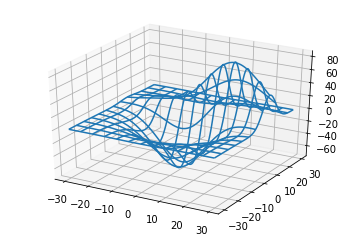

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [1]:
import sqlite3

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!